# Deep Learning Algorithms

[LAB 4](<./pdf/LAB%204%20(Deep%20Learning).pdf>)


You are expected to do 2 projects:

- one involving a neural network (NN) with a CSV dataset,
- other involving a convolutional neural network (CNN) with an image dataset.

Each project consists of **_15 points_** (totaling 30 points).

Completion of **_both projects is mandatory_** to pass this lab.

For Project Number 1, testing the model on the test dataset is optional, and
if you skip this step, you will receive 10 points.

Regarding Project Number 2, calculating the final accuracy and saving the model are optional, and if you skip them, you will receive 10 credits.

(Keep in mind that to pass all labs, you generally need 100 points.)


## First Implementation: Training a Neural Network

- In this implementation, we read a CSV dataset via Google Drive, then build and train a neural network model , and finally test it on test dataset and calculate loss values.
- (The dataset has been uploaded on Canvas, but can use your custom dataset)


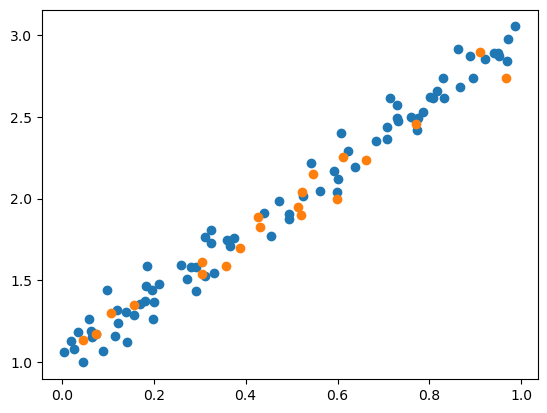

In [11]:
"""
Author: Alex Oachesu
Note: Code copied (as required) from the "LAB 4 (Deep Learning).pdf" src="./pdf/LAB 4 (Deep Learning).pdf" (Obs: needs PDF Viewer extension to visualize it in VSC)
Date: 17 Feb, 2024
"""

import torch
from torch import nn
from torch import optim
import pandas as pd
import matplotlib.pyplot as plt

# Step #1. Load the training & testing sets
df_train = pd.read_csv("./data/dataset_first_impl/train.csv")
df_test = pd.read_csv("./data/dataset_first_impl/test.csv")

df_train.head()
df_test.head()

# Splitting the training set into feature and target sets
x_train = torch.tensor(df_train["x"].values, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(df_train["y"].values, dtype=torch.float32)

# Splitting the testing set into feature and target sets
x_test = torch.tensor(df_test["x"].values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(df_test["y"].values, dtype=torch.float32)

# Scatter plot the train and the test sets
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

In [2]:
# Step #2. Build the NN model
nn_model = nn.Linear(1, 1)

nn_model

Linear(in_features=1, out_features=1, bias=True)

In [3]:
# Step #3. Define the loss function
loss_fn = nn.MSELoss()

In [4]:
# Step #4. Define the Optimizer
nn_model.parameters()

for name, param in nn_model.named_parameters():
    print(f"Name: {name}\nParameter: {param}")

optimizer = optim.SGD(nn_model.parameters(), lr=0.1)

Name: weight
Parameter: Parameter containing:
tensor([[0.2495]], requires_grad=True)
Name: bias
Parameter: Parameter containing:
tensor([-0.4567], requires_grad=True)


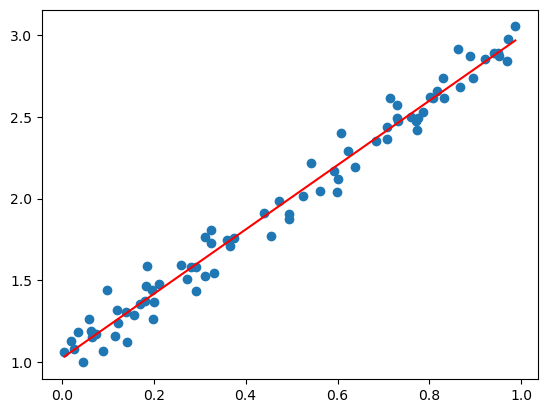

In [5]:
# Step #5. Training the model
epochs_n = 500
loss_hist = []


for i in range(epochs_n):
    y_pred = nn_model(x_train)
    loss = loss_fn(y_pred.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist.append(loss.item())
    # print(loss.item())

x_viz = torch.linspace(x_train.min(), x_train.max(), 100).unsqueeze(1)
y_viz = nn_model(x_viz)

plt.scatter(x_train, y_train)
plt.plot(x_viz.detach(), y_viz.detach(), "r")

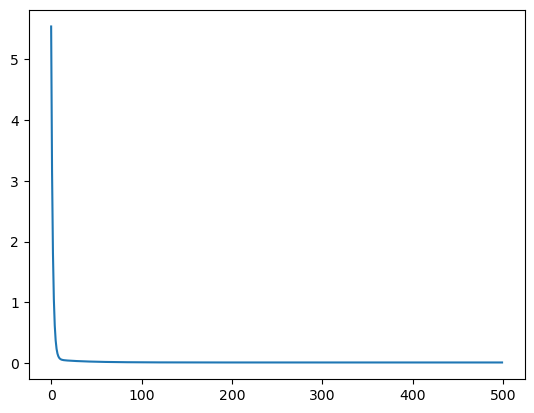

In [6]:
plt.plot(range(epochs_n), loss_hist)

In [8]:
import torch.nn.functional as F

# Step #6. Testing the model on the test dataset
y_test_pred = nn_model(x_test)


l1_loss = F.l1_loss(y_test_pred.squeeze(), y_test)
print(f"L1 Loss: {l1_loss.item():.4f}")

L1 Loss: 0.0736


## Second Implementation: Training a convolutional neural network (CNN)


<img src="./images/cnn_structure.png">

Notes:

- In this image classification implementation, we read Cifar10 dataset with pytorch, then build and train a CNN network model, and finally calculate the accuracy on test dataset.

- If you want to use other datasets, check this [link](https://pytorch.org/vision/stable/datasets.html#imageclassification)


In [2]:
"""
Author: Alex Oachesu
Note: Code copied (mostly, as required - a few modifications needed) from the "LAB 4 (Deep Learning).pdf" src="./pdf/LAB 4 (Deep Learning).pdf" (Obs: needs PDF Viewer extension to visualize it in VSC)
Date: 17 Feb, 2024
"""

import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torchvision

# Step #1. Downloading the dataset
data_train_set = torchvision.datasets.CIFAR10(
    root="./data/dataset_second_impl", train=True, download=True
)

data_test_set = torchvision.datasets.CIFAR10(
    root="./data/dataset_second_impl", train=False, download=True
)

Files already downloaded and verified
Files already downloaded and verified


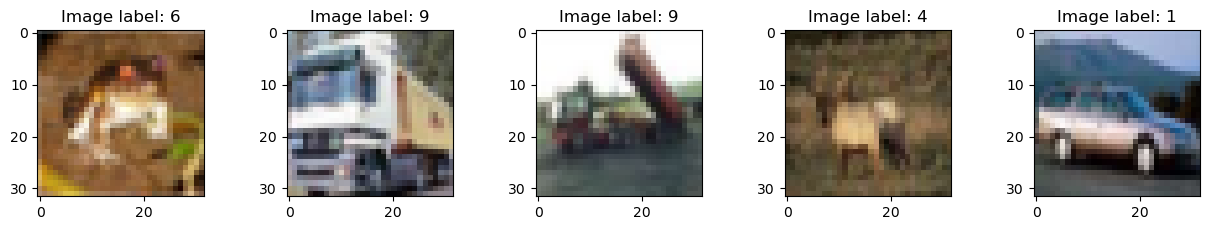

In [3]:
# Step #2. Checking a few images
images_coll = []

# Select first five images for display
for img in range(5):
    image, label = data_train_set[img]
    images_coll.append([image, label])

# Display images_coll images
plt.figure(figsize=(15, 5))
for i, (image, label) in enumerate(images_coll):
    plt.subplot(1, len(images_coll), i + 1)
    plt.imshow(image)
    plt.title(f"Image label: {label}")

plt.subplots_adjust(wspace=0.5)
plt.show()

In [4]:
# Step #3. Convert images to tensors
from torchvision.transforms import ToTensor

train_ds = torchvision.datasets.CIFAR10(
    root="./data/dataset_second_impl", train=True, transform=ToTensor()
)
test_ds = torchvision.datasets.CIFAR10(
    root="./data/dataset_second_impl", train=False, transform=ToTensor()
)

# Step #4. Batch size and DataLoader
batch_size = 64

# Create data loaders
train_dataloader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_ds, batch_size=batch_size, shuffle=True)

# Step #5. Check the dataloaders
for image, labels in train_dataloader:
    print(f"Labels Shape: {labels.shape}\nImage  Shape: {image.shape}")
    break

Labels Shape: torch.Size([64])
Image  Shape: torch.Size([64, 3, 32, 32])


torch.Size([64])
<class 'torch.Tensor'>


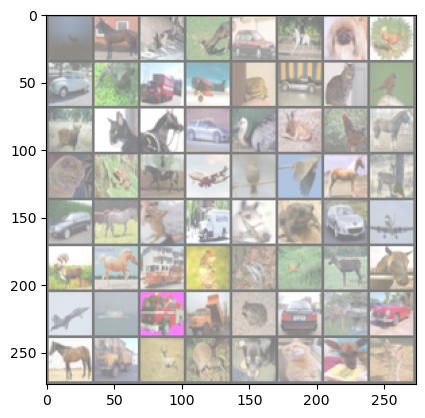

deer  horse cat   deer  car   horse dog   bird  
car   frog  truck plane frog  car   cat   bird  
deer  cat   horse car   bird  deer  bird  horse 
cat   frog  horse plane bird  bird  horse deer  
car   horse cat   truck horse frog  car   plane 
deer  horse truck bird  bird  deer  deer  horse 
plane ship  truck truck frog  car   deer  car   
horse truck deer  bird  dog   cat   dog   deer  


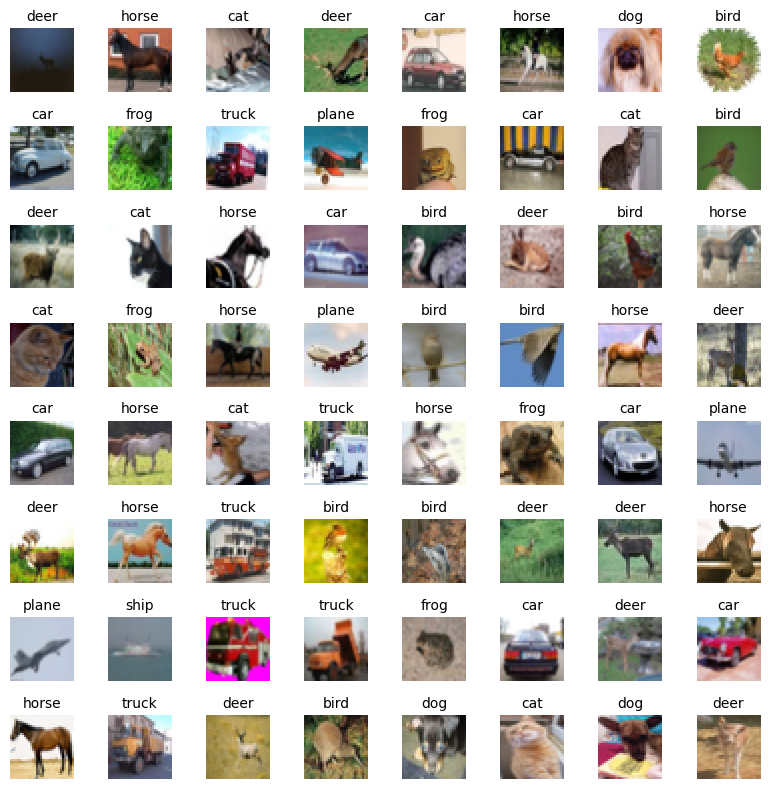

In [5]:
# Step #6. Visualizing one batch of images
import numpy as np
import matplotlib.pyplot as plt

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

"""
Display an image
"""

print(labels.shape)
print(type(labels))


def imshow(img):
    # Unnormalize?
    img = img / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()


# Get random training images
data_iterator = iter(train_dataloader)
images, labels = next(data_iterator)

# Display the selected images
imshow(torchvision.utils.make_grid(images))

# Print the labels inline
# print(" ".join(f"{classes[labels[j]]:5s}" for j in range(labels.shape[0])))

# Print the labels in a corresponding gris to match the images positioning (i8 * j8 = 64)
for i in range(8):  # 8 rows
    for j in range(8):  # 8 images per row
        label_index = i * 8 + j  # inline index
        print(f"{classes[labels[label_index]]:5s}", end=" ")
    print()

# Display the selected images with corresponding labels on top
fig, axs = plt.subplots(8, 8, figsize=(8, 8))

for i in range(8):  # 8 rows
    for j in range(8):  # 8 images per row
        img_index = i * 8 + j  # inline index
        # permute (channels, height, with) from tensor image representation to (height, width, channels) for imshow()
        axs[i, j].imshow(np.transpose(images[img_index], (1, 2, 0)))
        # hide the axes (display larger images)
        axs[i, j].axis("off")
        # set the label as img title
        axs[i, j].set_title(classes[labels[img_index]], fontsize=10)

plt.tight_layout()
plt.show()

In [6]:
# Step #7. Checking the GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using the {device} device")

Using the cpu device


In [7]:
# Step #8. Building a CNN model
import torch.nn as nn
import torch.nn.functional as F


# Model Definition
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv_2 = nn.Conv2d(6, 16, 5)
        self.fc_1 = nn.Linear(16 * 5 * 5, 120)
        self.fc_2 = nn.Linear(120, 84)
        self.fc_3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv_1(x)))
        x = self.pool(F.relu(self.conv_2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc_1(x))
        x = F.relu(self.fc_2(x))
        x = self.fc_3(x)
        return x


net = Net()

print(net)

Net(
  (conv_1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc_1): Linear(in_features=400, out_features=120, bias=True)
  (fc_2): Linear(in_features=120, out_features=84, bias=True)
  (fc_3): Linear(in_features=84, out_features=10, bias=True)
)


In [8]:
# Step #9. Loss Function and Optimizer

import torch.optim as optim
import torch.nn as nn


"""
the HingeEmbeddingLoss() is mostly used in training models in binary classification tasks, 
and it needs an activation function (to squash unbounded output into a 0-1 range), 
since it requires the model's output to be unbounded. 
This dataset has a bounded output domain, given by the defined list of possible output classes.
"""
# criterion = nn.HingeEmbeddingLoss()

"""
a solution is to use another criterion, more suitable for classifying inputs into multiple classes, 
as it is the case for this dataset. So, I have used `criterion = nn.CrossEntropyLoss()`, 
which is used for multi-class classification tasks. 
In this dataset, an input (image representation) can belong to one of the several possible output
classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
), 
so, it has a bounded output domain
"""
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
# Step #10. Training the CNN model
epochs = 20

for epoch in range(epochs):
    # each epoch = forward+backward
    running_loss = 0.0

    for i, data in enumerate(train_dataloader, 0):
        # get the input
        # data is [inputs, labels] list
        inputs, labels = data

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # item() converts loss val to a standard python number
        running_loss += loss.item()
    # print statistics
    print(f"Epoch: {epoch}\nnumber of images: {i}\nLoss: {running_loss}")

print("End training!")

Epoch: 0
number of images: 781
Loss: 1798.3819534778595
Epoch: 1
number of images: 781
Loss: 1766.704837322235
Epoch: 2
number of images: 781
Loss: 1630.0074189901352
Epoch: 3
number of images: 781
Loss: 1523.3551592826843
Epoch: 4
number of images: 781
Loss: 1426.4164258241653
Epoch: 5
number of images: 781
Loss: 1321.7940158843994
Epoch: 6
number of images: 781
Loss: 1253.84699010849
Epoch: 7
number of images: 781
Loss: 1200.5414986610413
Epoch: 8
number of images: 781
Loss: 1162.0759497880936
Epoch: 9
number of images: 781
Loss: 1133.1678812503815
Epoch: 10
number of images: 781
Loss: 1105.6248710155487
Epoch: 11
number of images: 781
Loss: 1081.0772724151611
Epoch: 12
number of images: 781
Loss: 1059.1176248192787
Epoch: 13
number of images: 781
Loss: 1037.9347369670868
Epoch: 14
number of images: 781
Loss: 1022.2089638710022
Epoch: 15
number of images: 781
Loss: 1004.7297515273094
Epoch: 16
number of images: 781
Loss: 987.8634203076363
Epoch: 17
number of images: 781
Loss: 971.392

In [10]:
# Step #11. Accuracy of the model
correct = 0
total = 0

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Network's 10000 test images ACCURACY is: {100 * correct / total}%")

Network's 10000 test images ACCURACY is: 55.33%


In [13]:
# Step #12. Saving the model:
torch.save(net.state_dict(), "./cnn_model/cnn_model.pth")
print("Saved pythorch model state to model.pth")

Saved pythorch model state to model.pth
